<a href="https://colab.research.google.com/github/LonelyFriday/datamining_chula/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd
%cd '/content/drive/MyDrive/dataMining/CART'
!pwd

/content
/content/drive/MyDrive/dataMining/CART
/content/drive/MyDrive/dataMining/CART


#Data Preprocessing

In [ ]:
import pandas as pd

In [ ]:
#load data
df = pd.read_csv('dataset_DT.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
#check null
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#3.a : replace Yes, No format in Attrition to 1, 0 format
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# check type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# 3.c : handle 7 categories feature
# which are 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
from sklearn.preprocessing import LabelEncoder

# Define columns to encode
cols_to_encode = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Initialize LabelEncoder object
le = LabelEncoder()

# Encode selected columns
df[cols_to_encode] = df[cols_to_encode].apply(lambda col: le.fit_transform(col))

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# find columns contain only single value
for col in df.columns:
  if df[col].nunique() == 1:
    print(f"Distinct values in column '{col}':" ,sep=" ")
    print(df[col].nunique())
    print()

In [ ]:
# split data: 80% is train set and 20% is test set
from sklearn.model_selection import train_test_split

# 3.b : define X and y
X = df.drop(['Attrition','EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
y = df['Attrition']

# X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#Decision Tree (Vanila)

In [ ]:
# 4. : Use sklearn.tree.DecisionTreeClassifier to construct the first decision tree CART
# using GINI criterion to predict Employee Attrition class
from sklearn.tree import DecisionTreeClassifier

# Train decision tree classifier using GINI criterion
clf = DecisionTreeClassifier(criterion='gini', random_state=1234)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [ ]:
# 4.a : Report the tree depth, samples_split of the first CART model
depth = clf.get_depth()
min_samples_split = clf.min_samples_split
print('depth = ', depth)
print('samples split = ', min_samples_split)

depth =  14
samples split =  2


In [ ]:
# 4.b : Report Confusion Matrix on both training set and test set

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on train and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate accuracy, recall, and precision of model on train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
print('Train set accuracy:', train_accuracy)
print('Train set confusion matrix:')
print(train_cm)
print('Train set classification report:')
print(train_report)

print('------------------------------------------------------------------')

# Evaluate accuracy, recall, and precision of model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
print('Test set accuracy:', test_accuracy)
print('Test set confusion matrix:')
print(test_cm)
print('Test set classification report:')
print(test_report)


Train set accuracy: 1.0
Train set confusion matrix:
[[986   0]
 [  0 190]]
Train set classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

------------------------------------------------------------------
Test set accuracy: 0.8061224489795918
Test set confusion matrix:
[[217  30]
 [ 27  20]]
Test set classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       247
           1       0.40      0.43      0.41        47

    accuracy                           0.81       294
   macro avg       0.64      0.65      0.65       294
weighted avg       0.81      0.81      0.81       294



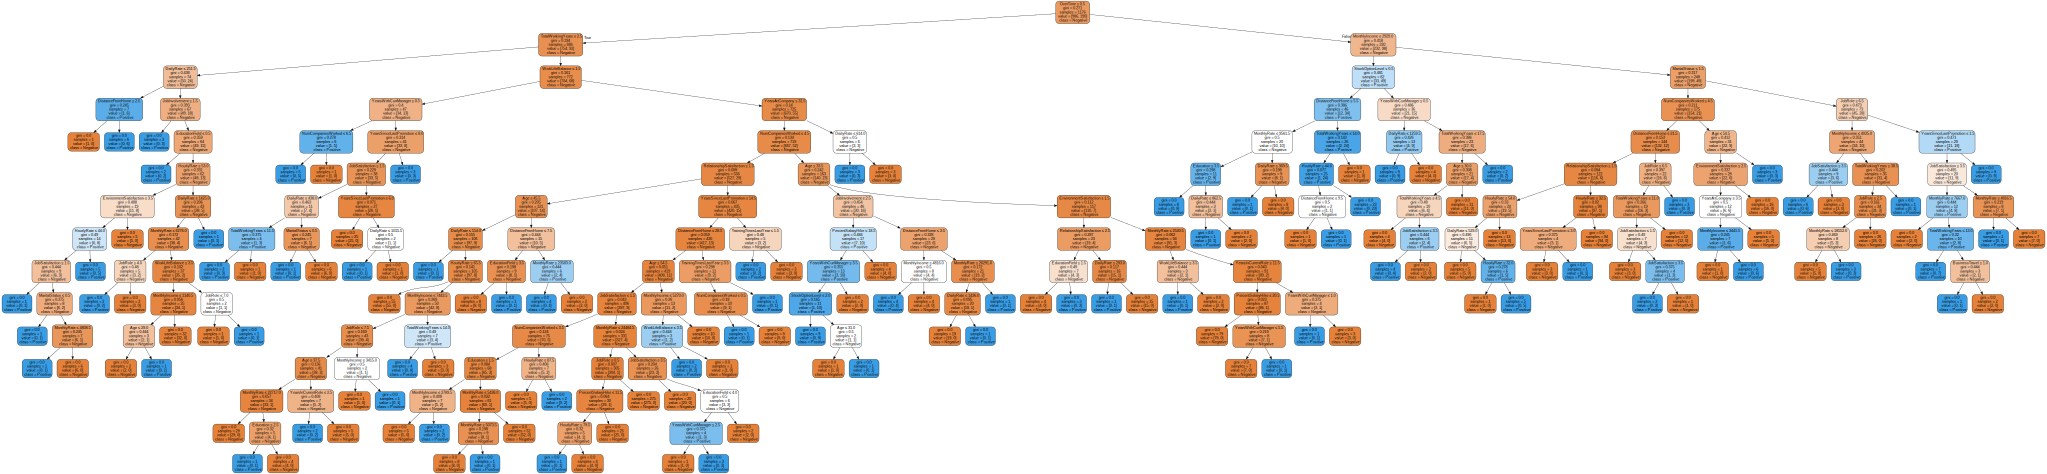

In [ ]:
# 4.c : vanila decision tree
from sklearn.tree import export_graphviz
import graphviz

# Assuming your trained decision tree model is called dt_model
dot_data = export_graphviz(clf, out_file=None, feature_names=X_train.columns, class_names=['Negative', 'Positive'], filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('vanila_decision_tree') # Save the visualization as a PDF file

graph


#Decision Tree with GridSearchCV

In [ ]:
# 5 : Construct the second decision tree CART using GridSearchCV() to tweak some hyperparameters:max_depth, min_samples_split
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier
dt_model = DecisionTreeClassifier(criterion='gini')

# Define the hyperparameters to tune
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11)}

# Perform grid search with 5 cross-validation
dt_grid = GridSearchCV(dt_model, param_grid=parameters, cv=5)
dt_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print('Best hyperparameters:', dt_grid.best_params_)
print('Accuracy score:', dt_grid.best_score_)

Best hyperparameters: {'max_depth': 1, 'min_samples_split': 2}
Accuracy score: 0.838434908041832


In [ ]:
# Define the decision tree classifier with the best hyperparameters
dt_model_fromGrid = DecisionTreeClassifier(criterion='gini', max_depth=dt_grid.best_params_['max_depth'], min_samples_split=dt_grid.best_params_['min_samples_split'])

# Train the model on the entire training set
dt_model_fromGrid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
# 5.b : Report Confusion Matrix on both training set and test set

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on train and test sets
y_train_pred = dt_model_fromGrid.predict(X_train)
y_test_pred = dt_model_fromGrid.predict(X_test)

# Evaluate accuracy, recall, and precision of model on train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
print('Train set accuracy:', train_accuracy)
print('Train set confusion matrix:')
print(train_cm)
print('Train set classification report:')
print(train_report)

print('------------------------------------------------------------------')

# Evaluate accuracy, recall, and precision of model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
print('Test set accuracy:', test_accuracy)
print('Test set confusion matrix:')
print(test_cm)
print('Test set classification report:')
print(test_report)


Train set accuracy: 0.8384353741496599
Train set confusion matrix:
[[986   0]
 [190   0]]
Train set classification report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       986
           1       0.00      0.00      0.00       190

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.70      0.84      0.76      1176

------------------------------------------------------------------
Test set accuracy: 0.8401360544217688
Test set confusion matrix:
[[247   0]
 [ 47   0]]
Test set classification report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

#Random Forest Classifier

In [ ]:
# 6. Construct the third RandomForestClassifier() and use GridSearchCV() to tweak some hyperparameters: max_depth, min_samples_split, n_estimators, and max_features
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier object
rfc = RandomForestClassifier()

# Set the parameters to be tuned
parameters = {'max_depth': [2, 4, 6],
              'min_samples_split': [2, 4, 6],
              'n_estimators': [100, 200, 300],
              'max_features': np.arange(0.1, 1, 0.1),
              'max_samples': [0.3, 0.5, 0.8]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator = rfc, param_grid = parameters, cv = 5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(grid_search.best_params_)


In [ ]:
# 6.Use Parameter from GridSearchCV 

from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': 6, 
          'max_features': 0.6, 
          'max_samples': 0.8, 
          'min_samples_split': 4, 
          'n_estimators': 100}

rfc = RandomForestClassifier(**params)

# Fit the RandomizedSearchCV object to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=0.6, max_samples=0.8,
                       min_samples_split=4)

In [ ]:
# 6.a : Report Confusion Matrix on both training set and test set

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on train and test sets
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Evaluate accuracy, recall, and precision of model on train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
print('Train set accuracy:', train_accuracy)
print('Train set confusion matrix:')
print(train_cm)
print('Train set classification report:')
print(train_report)

print('------------------------------------------------------------------')

# Evaluate accuracy, recall, and precision of model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
print('Test set accuracy:', test_accuracy)
print('Test set confusion matrix:')
print(test_cm)
print('Test set classification report:')
print(test_report)


Train set accuracy: 0.9081632653061225
Train set confusion matrix:
[[986   0]
 [108  82]]
Train set classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       986
           1       1.00      0.43      0.60       190

    accuracy                           0.91      1176
   macro avg       0.95      0.72      0.78      1176
weighted avg       0.92      0.91      0.89      1176

------------------------------------------------------------------
Test set accuracy: 0.8605442176870748
Test set confusion matrix:
[[244   3]
 [ 38   9]]
Test set classification report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.75      0.19      0.31        47

    accuracy                           0.86       294
   macro avg       0.81      0.59      0.61       294
weighted avg       0.85      0.86      0.82       294



In [ ]:
# 6. 
# Also find important features using RandomizedSearchCV() and tuning with RandomForest() as an estimator of the function.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier object
rfc = RandomForestClassifier()

# Set the parameters to be tuned
parameters = {'max_depth': [2, 4, 6],
              'min_samples_split': [2, 4, 6, 8, 10],
              'n_estimators': [100, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2']}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator = rfc, param_distributions = parameters, n_iter = 10, cv = 5)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print(random_search.best_params_)

# Get the feature importances from the best model
best_rfc = random_search.best_estimator_
feature_importances = best_rfc.feature_importances_

# Print the feature importances
for i, feature in enumerate(X_train.columns):
    print("{}: {}".format(feature, feature_importances[i]))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

{'n_estimators': 300, 'min_samples_split': 4, 'max_features': 'auto', 'max_depth': 6}
Age: 0.07275967176648553
BusinessTravel: 0.008780927029363115
DailyRate: 0.04475351580007614
Department: 0.012647165948999369
DistanceFromHome: 0.048661654119009294
Education: 0.012397867907519374
EducationField: 0.018441824077459843
EnvironmentSatisfaction: 0.033206352596919966
Gender: 0.005319393249619177
HourlyRate: 0.03549961097101716
JobInvolvement: 0.02884661939558722
JobLevel: 0.024618094719893423
JobRole: 0.029307832239012253
JobSatisfaction: 0.02987693056018203
MaritalStatus: 0.033910738335716666
MonthlyIncome: 0.08143950113504707
MonthlyRate: 0.04596598577471636
NumCompaniesWorked: 0.030674059376971704
OverTime: 0.08706998551774077
PercentSalaryHike: 0.02325492908184644
PerformanceRating: 0.0026008668077715613
RelationshipSatisfaction: 0.014935861514352083
StockOptionLevel: 0.05125752970349495
TotalWorkingYears: 0.06811552691643988
TrainingTimesLastYear: 0.016682021684603844
WorkLifeBalance:

##Use Parameter from RandomizeSearchCV 

In [ ]:
# 6.Use Parameter from RandomizeSearchCV 

from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': 100, 
          'min_samples_split': 2, 
          'max_features': 'auto', 
          'max_depth': 6}

rfc = RandomForestClassifier(**params)

# Fit the RandomizedSearchCV object to the training data
rfc.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=6, max_features='auto')

In [ ]:
# 6 : Report Confusion Matrix on both training set and test set

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on train and test sets
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Evaluate accuracy, recall, and precision of model on train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
print('Train set accuracy:', train_accuracy)
print('Train set confusion matrix:')
print(train_cm)
print('Train set classification report:')
print(train_report)

print('------------------------------------------------------------------')

# Evaluate accuracy, recall, and precision of model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
print('Test set accuracy:', test_accuracy)
print('Test set confusion matrix:')
print(test_cm)
print('Test set classification report:')
print(test_report)


Train set accuracy: 0.8894557823129252
Train set confusion matrix:
[[986   0]
 [130  60]]
Train set classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       986
           1       1.00      0.32      0.48       190

    accuracy                           0.89      1176
   macro avg       0.94      0.66      0.71      1176
weighted avg       0.90      0.89      0.86      1176

------------------------------------------------------------------
Test set accuracy: 0.8605442176870748
Test set confusion matrix:
[[247   0]
 [ 41   6]]
Test set classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       1.00      0.13      0.23        47

    accuracy                           0.86       294
   macro avg       0.93      0.56      0.57       294
weighted avg       0.88      0.86      0.81       294



## Using SelectFromModel()

In [ ]:
# 6.c List of the selected attributes using SelectFromModel()
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# create the classifier
clf = RandomForestClassifier()

# define the hyperparameter space to search
param_distributions = {'n_estimators': [10, 50, 100],
                       'max_depth': [None, 5, 10],
                       'min_samples_split': [2, 5, 10],
                       'max_features': np.arange(0.1, 1, 0.1),
                       'max_samples': [0.3, 0.5, 0.8]}

# create the randomized search object
rs = RandomizedSearchCV(clf, param_distributions, cv=5, n_iter=10, n_jobs=-1)

# fit the randomized search object to the data
rs.fit(X_train, y_train)

# get the best estimator from the randomized search
best_clf = rs.best_estimator_

# fit the best estimator to the data
best_clf.fit(X_train, y_train)

# use SelectFromModel to get the feature importances
sfm = SelectFromModel(best_clf)
sfm.fit(X_train, y_train)

# get the important features
important_features = X_train.columns[sfm.get_support()]

# print the important features
print(important_features)


Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')
